In [70]:
import seaborn as sns
import pandas as pd
import glob
import os
from collections import defaultdict

In [71]:
data_path = "/content/drive/MyDrive/VPN Deprecated/data"
out_path = "/content/drive/MyDrive/VPN Deprecated/Output"

In [72]:
df = pd.read_csv(f'{out_path}/dual_vpn_protocols.csv')

In [73]:
unique_pairs_df = df.groupby(['protocol', 'censys_protocol'])['count'].sum().reset_index()
unique_pairs_df['percentage'] = unique_pairs_df['count'] / total * 100
print(unique_pairs_df.sort_values(by='count', ascending=False))

       protocol censys_protocol  count  percentage
12    Wireguard           IKEv2  22401   44.801104
14    Wireguard         OpenVPN  10538   21.075578
3       OpenVPN           IKEv2   8482   16.963661
1   Nordwhisper           IKEv2   7238   14.475710
2       OpenVPN           IKEv1    941    1.881962
7   Shadowsocks           IKEv2    818    1.635967
9   Shadowsocks         OpenVPN    722    1.443971
11    Wireguard           IKEv1    301    0.601988
13    Wireguard            L2TP    238    0.475990
17         Xray           IKEv2    182    0.363993
5       OpenVPN            PPTP    166    0.331993
15    Wireguard            PPTP    165    0.329993
10  Shadowsocks            PPTP    164    0.327993
8   Shadowsocks            L2TP    163    0.325993
20         Xray            PPTP    161    0.321994
4       OpenVPN            L2TP    159    0.317994
18         Xray            L2TP    156    0.311994
0   Nordwhisper           IKEv1     53    0.105998
6   Shadowsocks           IKEv1

In [74]:
total = 50001
# add percentage layer

In [75]:
unique_pairs_df

,protocol,censys_protocol,count,percentage
0,Nordwhisper,IKEv1,53,0.105998
1,Nordwhisper,IKEv2,7238,14.475710
2,OpenVPN,IKEv1,941,1.881962
3,OpenVPN,IKEv2,8482,16.963661
4,OpenVPN,L2TP,159,0.317994
5,OpenVPN,PPTP,166,0.331993
6,Shadowsocks,IKEv1,17,0.033999
7,Shadowsocks,IKEv2,818,1.635967
8,Shadowsocks,L2TP,163,0.325993
9,Shadowsocks,OpenVPN,722,1.443971


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exclude specific protocols
filter_condition = (unique_pairs_df['protocol'] != 'openvpn, wireguard') & \
                   (unique_pairs_df['protocol'] != 'xray') & \
                   (unique_pairs_df['protocol'] != 'Nordwhisper')
filtered_unique_pairs_df = unique_pairs_df[filter_condition]

# Create a pivot table for the heatmap from the filtered data
heatmap_data = filtered_unique_pairs_df.pivot_table(index='protocol', columns='censys_protocol', values='count').fillna(0)

# Apply logarithmic transformation to the data for color scaling
heatmap_data_log = np.log1p(heatmap_data) # log1p handles zero values gracefully


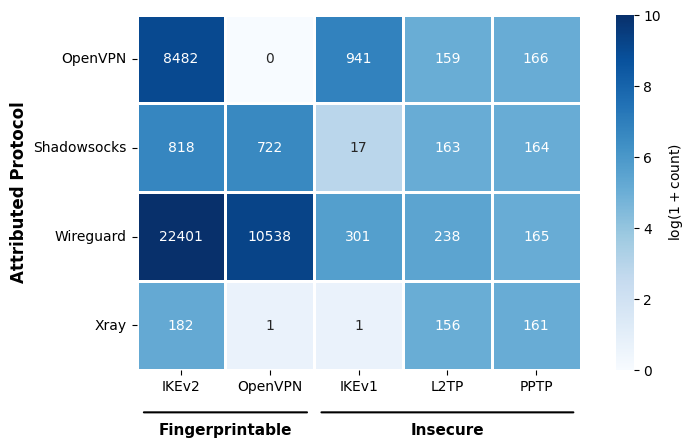

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filter_condition = (unique_pairs_df['protocol'] != 'openvpn, wireguard') & \
                   (unique_pairs_df['protocol'] != 'xray') & \
                   (unique_pairs_df['protocol'] != 'Nordwhisper')
filtered_unique_pairs_df = unique_pairs_df[filter_condition]

# Create a pivot table for the heatmap from the filtered data
heatmap_data = filtered_unique_pairs_df.pivot_table(index='protocol', columns='censys_protocol', values='count').fillna(0)

# Apply logarithmic transformation to the data for color scaling
heatmap_data_log = np.log1p(heatmap_data) # log1p handles zero values gracefully


history = {
  "WireGuard" : 23639,
  "OpenVPN": 9923,
  "ShadowSocks": 1157,
  "Xray":620
}

# 1. Manually define the column order to ensure the groups are contiguous
# Group 1: Fingerprintable | Group 2: Insecure
desired_col_order = ['IKEv2', 'OpenVPN', 'IKEv1', 'L2TP', 'PPTP']
desired_row_order = ['WireGuard', 'OpenVPN', 'ShadowSocks', 'Xray']

# Reindex the dataframe to this specific order
heatmap_data = heatmap_data.reindex(columns=desired_col_order)
heatmap_data_log = np.log1p(heatmap_data)
annot = heatmap_data.astype(int).astype(str)

fig, ax = plt.subplots(figsize=(9, 5))

# Create the heatmap
sns.heatmap(
    heatmap_data_log,
    annot=annot, fmt="",
    cmap="Blues",
    linewidths=1.0,
    linecolor="white",
    square=True,
    cbar_kws={"label": r"$\log(1 + \mathrm{count})$"},
    vmin=0,
    ax=ax
)

# --- Axis Labeling ---
ax.set_xlabel("")
ax.set_ylabel("Attributed Protocol", fontsize=12, fontweight='bold')

# Y-axis diagonal rotation (as requested)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")
# X-axis horizontal for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# --- Grouping Brackets ---
# trans allows us to use 'data' coordinates for X and 'axes' coordinates for Y
trans = ax.get_xaxis_transform()

# Group 1: Fingerprintable (Cols 0 to 1: IKEv2, OpenVPN)
ax.annotate('', xy=(0.05, -0.12), xycoords=trans, xytext=(1.95, -0.12),
            arrowprops=dict(arrowstyle='-', color='black', lw=1.5))
ax.text(1, -0.15, "Fingerprintable", transform=trans,
        ha='center', va='top', fontsize=11, fontweight='bold')

# Group 2: Insecure (Cols 2 to 4: IKEv1, L2TP, PPTP)
ax.annotate('', xy=(2.05, -0.12), xycoords=trans, xytext=(4.95, -0.12),
            arrowprops=dict(arrowstyle='-', color='black', lw=1.5))
ax.text(3.5, -0.15, "Insecure", transform=trans,
        ha='center', va='top', fontsize=11, fontweight='bold')

plt.tight_layout()
# Adjust to make sure the labels and brackets fit in the PDF
plt.subplots_adjust(bottom=0.25, left=0.2)

plt.savefig(f"{out_path}/heatmap.pdf", dpi=300, bbox_inches="tight")
plt.show()

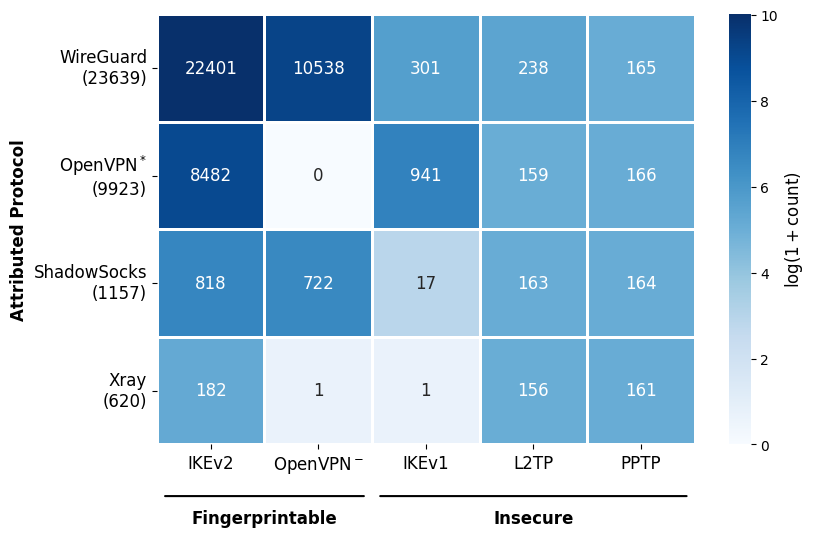

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- 1. Data Filtering & Pivot ---
filter_condition = (unique_pairs_df['protocol'] != 'openvpn, wireguard') & \
                   (unique_pairs_df['protocol'] != 'xray') & \
                   (unique_pairs_df['protocol'] != 'Nordwhisper')
filtered_unique_pairs_df = unique_pairs_df[filter_condition]

heatmap_data = filtered_unique_pairs_df.pivot_table(
    index='protocol',
    columns='censys_protocol',
    values='count'
).fillna(0)

# --- 2. Fix Case-Sensitivity & Normalization ---
# Normalize index to match desired_row_order keys
heatmap_data.index = heatmap_data.index.str.lower()
rename_map = {
    'wireguard': 'WireGuard',
    'openvpn': 'OpenVPN',
    'shadowsocks': 'ShadowSocks',
    'xray': 'Xray'
}
heatmap_data = heatmap_data.rename(index=rename_map)

history = {
  "WireGuard": 23639,
  "OpenVPN": 9923,
  "ShadowSocks": 1157,
  "Xray": 620
}

desired_col_order = ['IKEv2', 'OpenVPN', 'IKEv1', 'L2TP', 'PPTP']
desired_row_order = ['WireGuard', 'OpenVPN', 'ShadowSocks', 'Xray']

# Reindex to force the specific order
heatmap_data = heatmap_data.reindex(index=desired_row_order, columns=desired_col_order).fillna(0)

# --- 3. Label Preparation (Fontsize 12) ---
y_labels = [
    f"OpenVPN$^*$\n({history[row]})" if row == "OpenVPN" else f"{row}\n({history[row]})"
    for row in desired_row_order
]

x_labels = [
    r"OpenVPN$^-$" if col == "OpenVPN" else col
    for col in desired_col_order
]

# --- 4. Processing & Plotting ---
heatmap_data_log = np.log1p(heatmap_data)
annot = heatmap_data.astype(int).astype(str)

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
    heatmap_data_log,
    annot=annot,
    fmt="",
    cmap="Blues",
    linewidths=1.0,
    linecolor="white",
    square=True,
    annot_kws={"size": 12},  # Cell annotation font size
    cbar_kws={"label": r"$\log(1 + \mathrm{count})$"},
    vmin=0,
    ax=ax
)

# --- Fontsize 12 Global Settings ---
# Colorbar label size
ax.figure.axes[-1].yaxis.label.set_size(12)

# Axis Labels
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Attributed Protocol", fontsize=12, fontweight='bold')

# Tick Labels
ax.set_yticklabels(y_labels, rotation=0, ha="right", rotation_mode="anchor", fontsize=12)
ax.set_xticklabels(x_labels, rotation=0, fontsize=12)

# --- 5. Grouping Brackets ---
trans = ax.get_xaxis_transform()

# Group 1: Fingerprintable
ax.annotate('', xy=(0.05, -0.12), xycoords=trans, xytext=(1.95, -0.12),
            arrowprops=dict(arrowstyle='-', color='black', lw=1.5))
ax.text(1, -0.15, "Fingerprintable", transform=trans,
        ha='center', va='top', fontsize=12, fontweight='bold')

# Group 2: Insecure
ax.annotate('', xy=(2.05, -0.12), xycoords=trans, xytext=(4.95, -0.12),
            arrowprops=dict(arrowstyle='-', color='black', lw=1.5))
ax.text(3.5, -0.15, "Insecure", transform=trans,
        ha='center', va='top', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.25, left=0.3)

plt.savefig(f"{out_path}/heatmap.pdf", dpi=300, bbox_inches="tight")
plt.show()